In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Create trajectory utils methods

In [6]:
# Generate 2d zig_zag path
def generate_zig_zag_path(x_start, y_start, n_points, x_d): 
    
    pts = [(x_start, y_start)]
    for i in range(0, n_points):
        if i > 0:
            pt_ = (x_start+i*x_d, (-1)**i*y_start)
            pts.append(pt_)
    return np.array(pts)


def Linear_waypoints(ps, pg, n):
    
    x = np.linspace(ps[0], pg[0], n)
    y = np.linspace(ps[1], pg[1], n)
    z = np.linspace(ps[2], pg[2], n)

    return np.stack((x, y, z), axis=-1)
        
def cast2np(x): 
    return np.array(x)

def parabolic_path(start_point, end_point, height, N, yaw_angle):
    # Extract the coordinates from the input tuples
    x1, y1 = start_point
    x2, y2 = end_point

    # Calculate the vertex (midpoint in x, height from start point in y)
    xv = (x1 + x2) / 2
    yv = y1 + height

    # Set up the system of linear equations
    # Equation 1: y1 = a*x1^2 + b*x1 + c
    # Equation 2: y2 = a*x2^2 + b*x2 + c
    # Equation 3: yv = a*xv^2 + b*xv + c
    A = np.array([
        [x1**2, x1, 1],
        [x2**2, x2, 1],
        [xv**2, xv, 1]
    ])
    B = np.array([y1, y2, yv])

    # Solve the system of equations to find a, b, c
    a, b, c = np.linalg.solve(A, B)
    
    
    # Generate N points along the parabola
    x_points = np.linspace(x1, x2, N)* np.sin(np.radians(yaw_angle))
    y_points = (a * x_points**2 + b * x_points + c)#*np.cos(np.radians(yaw_angle))

    return x_points, y_points

def generate_circular_path(start_pose, radius, num_points=50):
    """
    Generates a circular path from a starting pose.
    
    Parameters:
    - start_pose: Tuple of (x, y, theta) representing the starting position and orientation of the robot.
    - radius: The radius of the circular path.
    - num_points: Number of points to generate on the circular path.
    
    Returns:
    - List of (x, y) tuples representing the points on the circular path.
    """
    # TODO: Make more robust conversion at some point in time
    x_start = start_pose[0]
    y_start = start_pose[1]
    z_start = start_pose[2]
    theta_start = 0; 
    circular_path = []
    
    for i in range(num_points):
        angle = 2 * math.pi * i / num_points
        x = x_start + radius * math.cos(angle + theta_start) - radius
        y = y_start + radius * math.sin(angle + theta_start) 
        z = z_start

        circular_path.append([x, y, z])
    
    return circular_path

In [72]:
pts = generate_zig_zag_path(1, 0.1, 10, 0.5)

## Hypothesis



Our hypothesis is that we have collection of the touch points. Which we have to touch. 
For the purpose of the simplicity, we can use simple points on the space, just to test our algorithm. 

In [74]:
x = np.linspace(0, 15, 50)
y = np.sin(x)

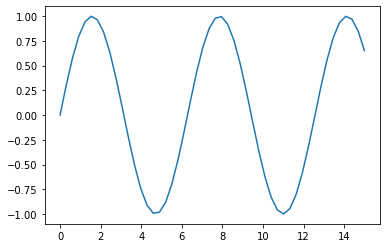

In [75]:
plt.plot(x, y)

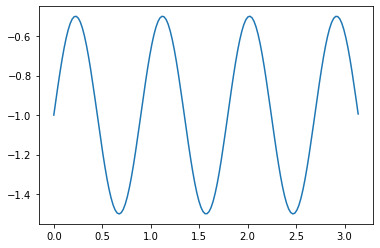

In [76]:
y_lim = 0.5 # Defines max amplitude (wall distance)
num_pts = 5
x = np.linspace(0, 3.14, 150) # Defines how many contact points will we have, 3.14 is full sinusoide wave [1 contact point]
y = y_lim * np.sin((num_pts + 2)*x) - 1
plt.plot(x, y)

In [77]:
def parabola(x, a=1, b=0, c=0): 
    return a*x**2 + b*x + c 

x = np.linspace(-5, 5, 100)
# Parabola without b and c element 
y = parabola(x, 2, 0, 0)

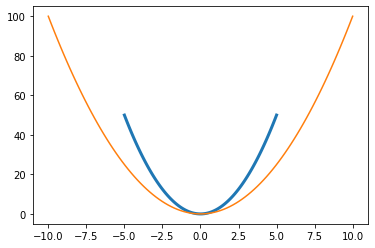

In [78]:
plt.plot(x, y, linewidth=3)
plt.plot(2*x, parabola(2*x))

In [79]:
def poly_f(x, order): 
    return x**order

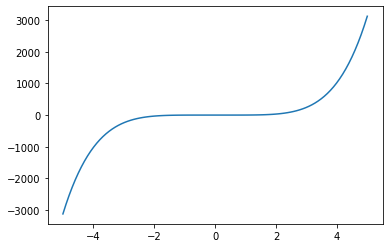

In [80]:
y = poly_f(x, 5)
plt.plot(x, y)

### Bezier? 

Why is bezier different than any kind of polynomials used for any kind of the path parametrization

In [81]:
pts = generate_zig_zag_path(0, 1.0, 10, 0.5)

In [82]:
def quad_bezier(p0, p1, p2, t_min=0, t_max=1): 
    t = np.linspace(t_min, t_max, 100)
    bezier_x = (1-t)*p0[0] + 2*t*(1-t)*p1[0] + t**2*p2[0]
    bezier_y = (1-t)*p0[1] + 2*t*(1-t)*p1[1] + t**2*p2[1]
    return bezier_x, bezier_y

In [83]:
# First one
p0 = cast2np(pts[0, :]) 
p1 = cast2np(pts[1, :]) 
p2 = cast2np(pts[2, :])
# Second one
b0 = cast2np(pts[2, :])
b1 = cast2np(pts[3, :])
b2 = cast2np(pts[4, :])
# Third one
c0 = cast2np(pts[4, :])
c1 = cast2np(pts[5, :])
c2 = cast2np(pts[6, :])
# Fourth one
d0 = cast2np(pts[6, :])
d1 = cast2np(pts[7, :])
d2 = cast2np(pts[8, :])

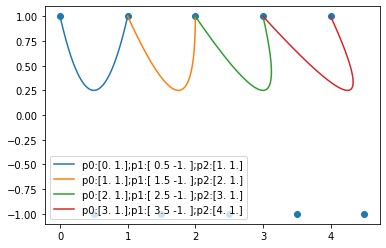

In [84]:
#p1 = p1 + np.array([0, 0.1])
bzr_x, bzr_y = quad_bezier(p0, p1, p2, t_min=0, t_max=1)
#b1 = b1 + np.array([0, 0.05])
pzr_x, pzr_y = quad_bezier(b0, b1, b2)
czr_x, czr_y = quad_bezier(c0, c1, c2)
dzr_x, dzr_y = quad_bezier(d0, d1, d2)
plt.figure()
plt.scatter(pts[:, 0], pts[:, 1])
plt.plot(bzr_x, bzr_y, label=f'p0:{p0};p1:{p1};p2:{p2}')
plt.plot(pzr_x, pzr_y, label=f'p0:{b0};p1:{b1};p2:{b2}')
plt.plot(czr_x, czr_y, label=f'p0:{c0};p1:{c1};p2:{c2}')
plt.plot(dzr_x, dzr_y, label=f'p0:{d0};p1:{d1};p2:{d2}')
plt.legend()
# https://math.umd.edu/~immortal/MATH431/book/ch_bezier.pdf
# Figure out why are they skewed to this point? Hmm... 

In [85]:
print(bzr)

NameError: name 'bzr' is not defined

In [27]:
import yaml

def load_states_from_yaml(yaml_file):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
    
    states = []
    for item in data:
        state = {
            'State': item['State'],
            'Position': {
                'x': item['Position'][0],
                'y': item['Position'][1],
                'z': item['Position'][2]
            },
            'Velocity': {
                'x': item['Velocity'][0],
                'y': item['Velocity'][1],
                'z': item['Velocity'][2]
            },
            'Acceleration': {
                'x': item['Acceleration'][0],
                'y': item['Acceleration'][1],
                'z': item['Acceleration'][2]
            }
        }
        states.append(state)
    
    return states

def plot_trajectory(states):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    titles = ['Position', 'Velocity', 'Acceleration']
    labels = ['X', 'Y', 'Z']

    for i in range(3):  # Iterate over columns (Position, Velocity, Acceleration)
        for j in range(3):  # Iterate over rows (X, Y, Z)
            ax = axs[j, i]
            ax.set_title(f"{titles[i]} {labels[j]}")

            # Extract data for the current subplot
            data = [state[titles[i]][labels[j].lower()] for state in states]

            # Plot the data
            ax.plot(range(len(states)), data, marker='o', linestyle='-', color='b')
            ax.set_xlabel('Time')
            ax.set_ylabel(f'{titles[i]} {labels[j]}')
            
    plt.tight_layout()
    plt.show()
            
def plot_trajectories(states1, states2):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))
    titles = ['Position', 'Velocity', 'Acceleration']
    labels = ['X', 'Y', 'Z']

    for i in range(3):  # Iterate over columns (Position, Velocity, Acceleration)
        for j in range(3):  # Iterate over rows (X, Y, Z)
            ax = axs[j, i]
            ax.set_title(f"{titles[i]} {labels[j]}")
            
            # Extract data for the current subplot from the first set of states
            data1 = [state[titles[i]][labels[j].lower()] for state in states1]
            # Extract data for the current subplot from the second set of states
            data2 = [state[titles[i]][labels[j].lower()] for state in states2]

            # Plot the data from the first set of states in blue
            ax.plot(range(len(states1)), data1, marker='o', linestyle='-', color='b', label='Linear')
            # Plot the data from the second set of states in red
            ax.plot(range(len(states2)), data2, marker='o', linestyle='-', color='r', label='Nonlinear')
            
            ax.set_xlabel('Time')
            ax.set_ylabel(f'{titles[i]} {labels[j]}')
            ax.legend()

    plt.tight_layout()
    plt.show()


In [28]:
lin_states = load_states_from_yaml("./lin_opt_states3.yaml")
nonlin_states = load_states_from_yaml("./non_lin_opt_states3.yaml")

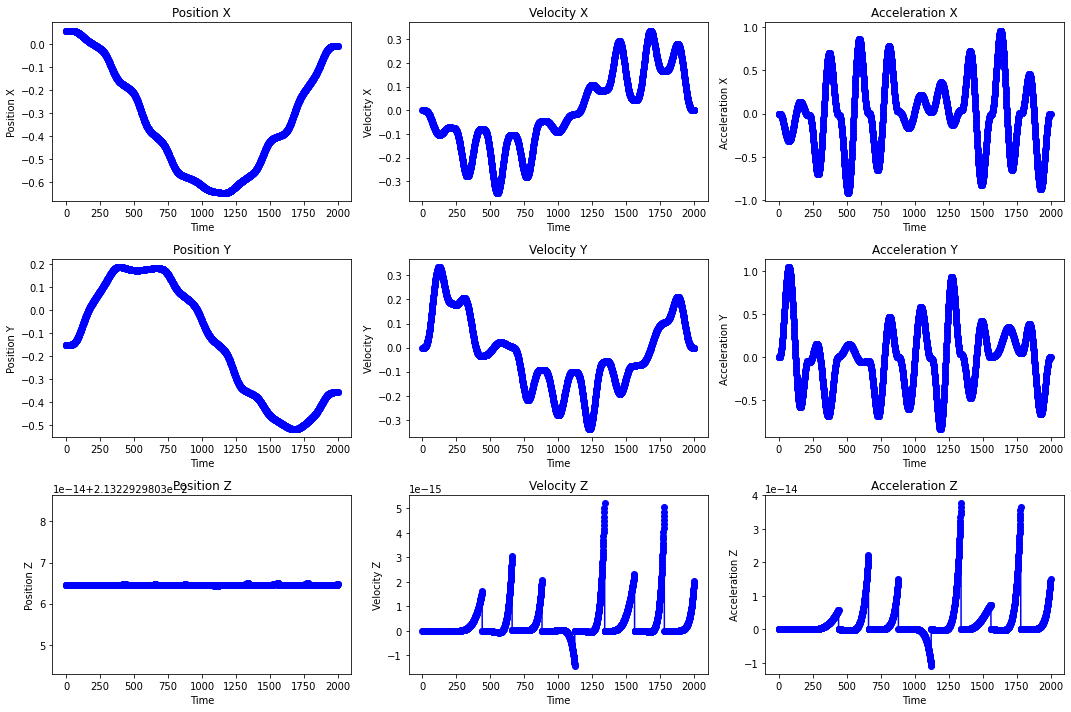

In [29]:
plot_trajectory(nonlin_states)

In [30]:

# Example usage:
# Assuming 'states1' and 'states2' are loaded from the YAML files using load_states_from_yaml method
# plot_trajectory(states1, states2)

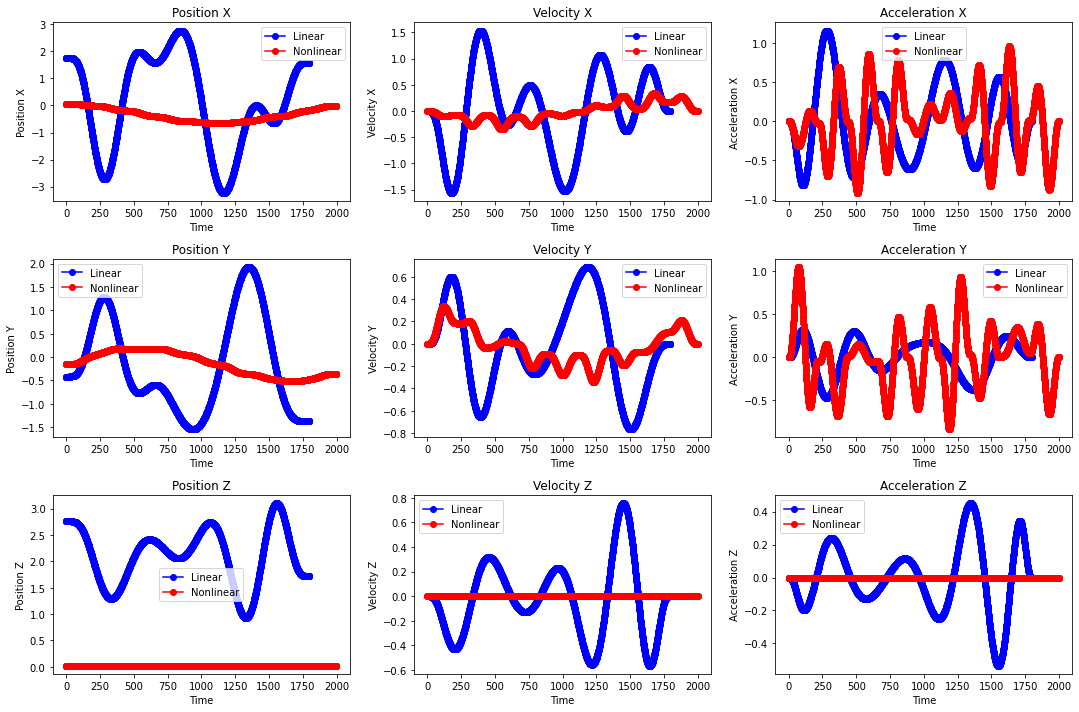

<Figure size 432x288 with 0 Axes>

In [31]:
# NUM ITERATIONS = 1000
plot_trajectories(lin_states, nonlin_states)
plt.savefig("linopt_vs_nonlinopt1.png")

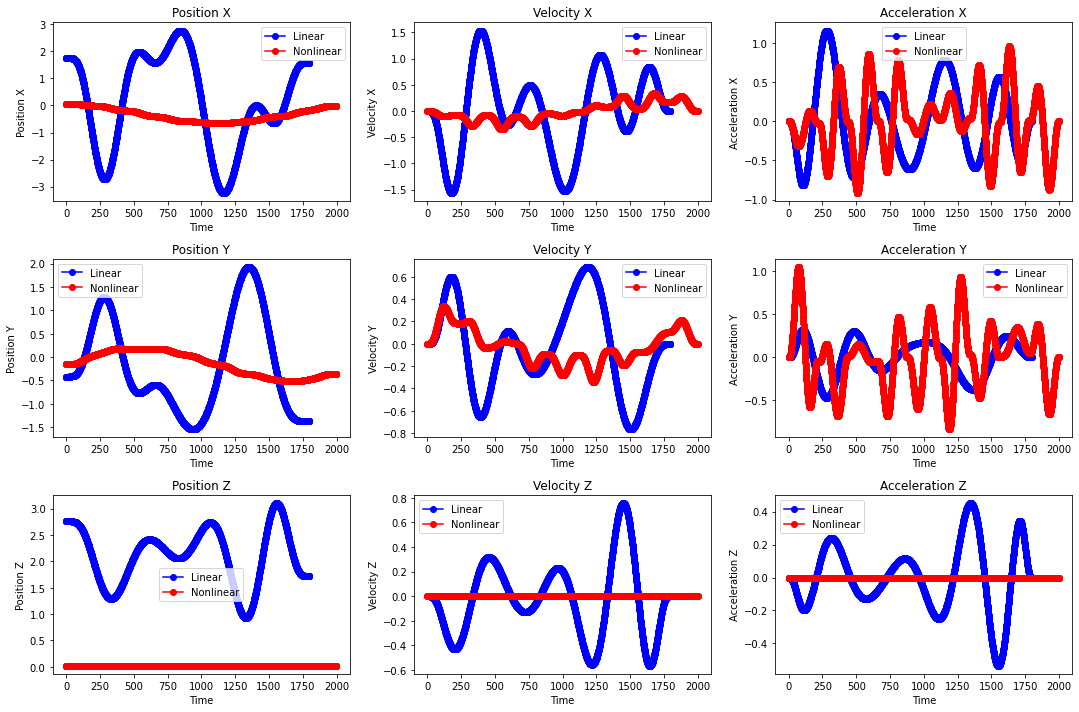

<Figure size 432x288 with 0 Axes>

In [32]:
# NUM_ITERATIONS = 10000
# MAX_CONSTRAINT ACCELERATION
lin_states1 = load_states_from_yaml("./lin_opt_states3.yaml")
nonlin_states1 = load_states_from_yaml("./non_lin_opt_states3.yaml")
plot_trajectories(lin_states1, nonlin_states1)
plt.savefig("linopt_vs_nonlinopt2.png")

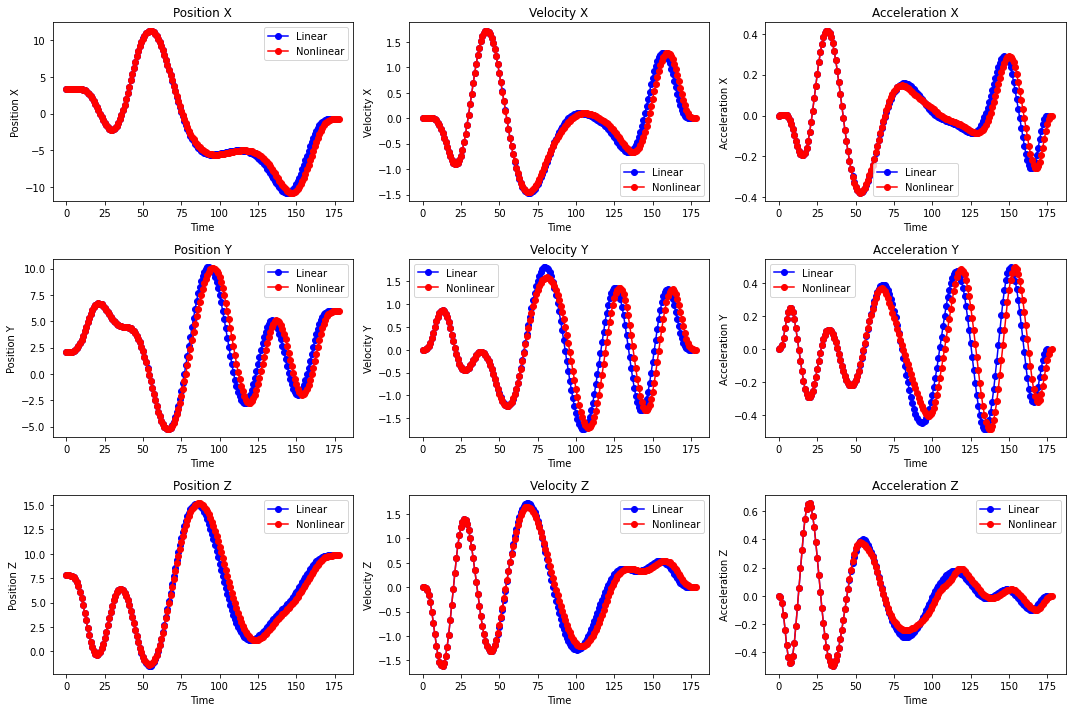

<Figure size 432x288 with 0 Axes>

In [33]:
# NUM_ITERATIONS = 10000
# MAX_CONSTRAINT VELOCITY (IN NONLIN ALSO)
lin_states2 = load_states_from_yaml("./lin_opt_states2.yaml")
nonlin_states2 = load_states_from_yaml("./non_lin_opt_states2.yaml")
plot_trajectories(lin_states2, nonlin_states2)
plt.savefig("linopt_vs_nonlinopt3.png")

In [15]:
pth = generate_circular_path([0, 0, 2], 0.3, 50)

In [55]:
import math


# Example usage:

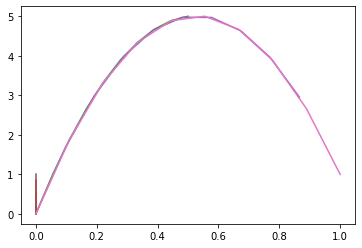

In [56]:
x, y = parabolic_path([0, 0], [1, 1] , 5, 10, 0)
x1, y1 = parabolic_path([0, 0], [1, 1], 5, 10, 30)
x2, y2 = parabolic_path([0, 0], [1, 1], 5, 10, 60)
x3, y3 = parabolic_path([0, 0], [1, 1], 5, 10, 90)



plt.figure()
plt.plot(x, y)
plt.plot(x, x1, x1, y1)
plt.plot(x, x2, x2, y2)
plt.plot(x, x3, x3, y3)


## Link to the [motion/path planning with splines](http://www2.informatik.uni-freiburg.de/~lau/students/Sprunk2008.pdf)

## Tangent on a [curve](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/core-mathematics/calculus/tangents-and-normals.html)

## [Bayesian optimization](https://www.run.ai/guides/hyperparameter-tuning/bayesian-hyperparameter-optimization) 

[INFO]  Data folder ./bags/circle_tracking already exists. Not creating.
              Topics                      Types  Message Count     Frequency
0  /flynav/curr_odom          nav_msgs/Odometry           4576  76260.072727
1           /pose_in  geometry_msgs/PoseStamped           7719    200.315400


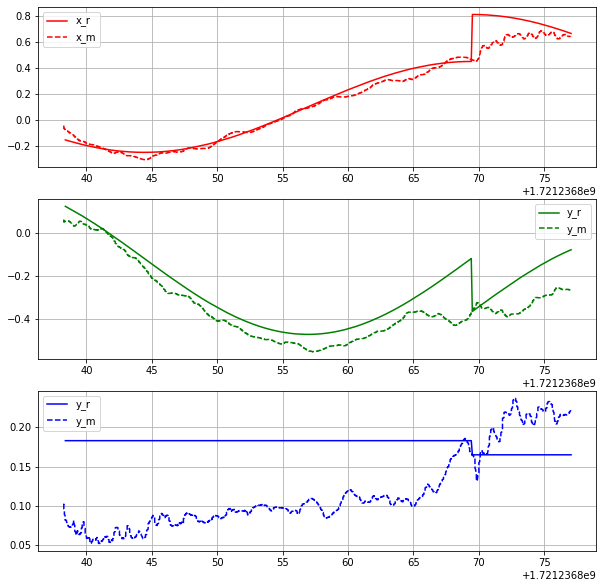

In [36]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt

# Load the bag file
bag = bagreader('./bags/circle_tracking.bag')

# List the available topics in the bag file
print(bag.topic_table)

# Read the specific topic, replace '/poseStamped_topic' with your topic name
pose_data = bag.message_by_topic('/pose_in')
odom_data = bag.message_by_topic('/flynav/curr_odom')

# Load the data into a pandas dataframe
df = pd.read_csv(pose_data)
df_ = pd.read_csv(odom_data)

# Display the dataframe columns to understand what data is available
#print(df.columns)

# Plot the data (for example, plotting position x and y over time)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
#n = 2000
n = 500000
ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
ax1.legend()
ax1.grid()

ax2.plot(df['Time'][:n], df['pose.position.y'][:n], label='y_r', color='g')
ax2.plot(df_['Time'][:n], df_['pose.pose.position.y'][:n], label='y_m', linestyle='--', color='g')
ax2.legend()
ax2.grid()

ax3.plot(df['Time'][:n], df['pose.position.z'][:n], label='y_r', color='b')
ax3.plot(df_['Time'][:n], df_['pose.pose.position.z'][:n], label='y_m', linestyle='--', color='b')
ax3.legend()
ax3.grid()

In [67]:
b = [1, 2, 3]
a = []
a.append([i for i in b][0])

In [68]:
print(list(a))

[1]


## Plot an electromagnetic field 

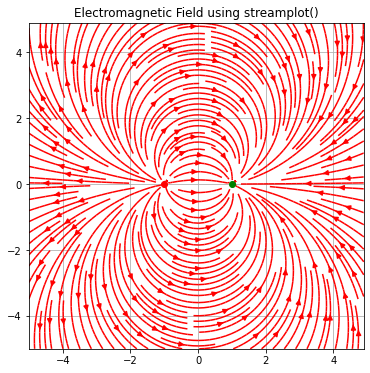

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Creating coordinates
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)

# Creating a meshgrid
X,Y = np.meshgrid(x,y)

# Assigning vector directions
Ex = (X + 1)/((X+1)**2 + Y**2) - (X - 1)/((X-1)**2 + Y**2)
Ey = Y/((X+1)**2 + Y**2) - Y/((X-1)**2 + Y**2)

# Depict illustration
plt.figure(figsize=(6, 6))
plt.streamplot(X,Y,Ex,Ey, density=2.0, linewidth=None, color='red')
plt.plot(-1,0,'-or')
plt.plot(1,0,'-og')
plt.title('Electromagnetic Field using streamplot()')

plt.grid()
plt.show()


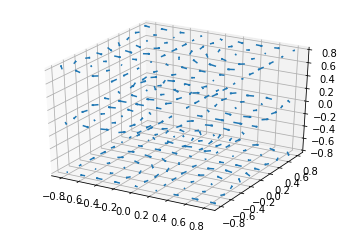

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

u1 = 

ax.quiver(x, y, z, u, v, w, length=0.1)

plt.show()

## Plotter methods

In [23]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt

def plot_position(bag_path): 
    
    # Load the bag file
    bag = bagreader(bag_path)

    # Read the specific topic, replace '/poseStamped_topic' with your topic name
    pose_data = bag.message_by_topic('/pose_in')
    odom_data = bag.message_by_topic('/flynav/vio_odom')

    # Load the data into a pandas dataframe
    df = pd.read_csv(pose_data)
    df_ = pd.read_csv(odom_data)

    # Plot the data (for example, plotting position x and y over time)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    # TODO: Add plot title
    ax1.plot(df['Time'], df['pose.position.x'], label='x_r', color='r')
    ax1.plot(df_['Time'], df_['pose.pose.position.x'], label='x_m', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()

    ax2.plot(df['Time'], df['pose.position.y'], label='y_r', color='g')
    ax2.plot(df_['Time'], df_['pose.pose.position.y'], label='y_m', linestyle='--', color='g')
    ax2.legend()
    ax2.grid()

    ax3.plot(df['Time'], df['pose.position.z'], label='y_r', color='b')
    ax3.plot(df_['Time'], df_['pose.pose.position.z'], label='y_m', linestyle='--', color='b')
    ax3.legend()
    ax3.grid()  
    
def plot_odometries(bag_path): 
    
    bag = bagreader(bag_path)
    
    odom1_data = bag.message_by_topic('/flynav/vio_odom')
    odom2_data = bag.message_by_topic('/kalman_scan2map_node/odometry_ros')
    
    df1 = pd.read_csv(odom1_data)
    df2 = pd.read_csv(odom2_data)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    
    ax1.plot(df1['Time'], df1['pose.pose.position.x'], label='xv', color='r')
    ax1.plot(df2['Time'], df2['pose.pose.position.x'], label='xf', linestyle='--', color='r')
    ax1.legend()
    ax1.grid()
    
    ax2.plot(df1['Time'], df1['pose.pose.position.y'], label='yv', color='g')
    ax2.plot(df2['Time'], df2['pose.pose.position.y'], label='yf', linestyle='--',color='g')
    ax2.legend()
    ax2.grid()
    
    ax3.plot(df1['Time'], df1['pose.pose.position.z'], label='zv', color='b')
    ax3.plot(df2['Time'], df2['pose.pose.position.z'], label='zf', linestyle='--',color='b')
    ax3.legend()
    ax3.grid()
    

[INFO]  Data folder ./bags/ground_effect already exists. Not creating.


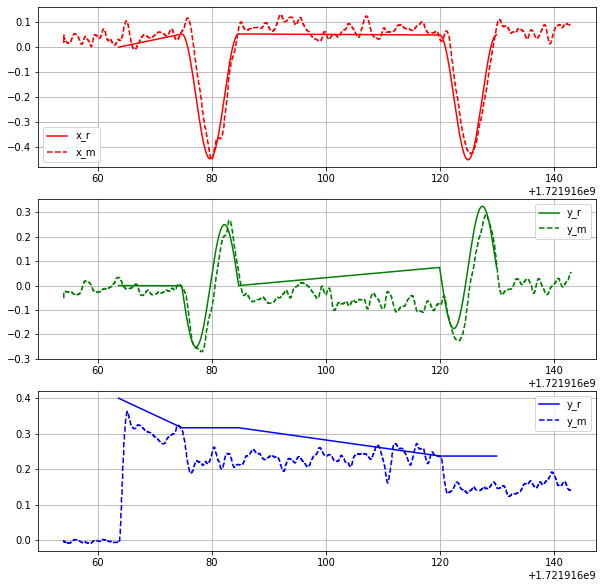

In [24]:
plot_position('./bags/ground_effect.bag')

## Comments and observations: 

No I term currently. Rope can induce disturbance. Ground effect can induce dusturbance. 


[INFO]  Data folder ./bags/square_circle already exists. Not creating.
[INFO]  Data folder ./bags/square_circle already exists. Not creating.


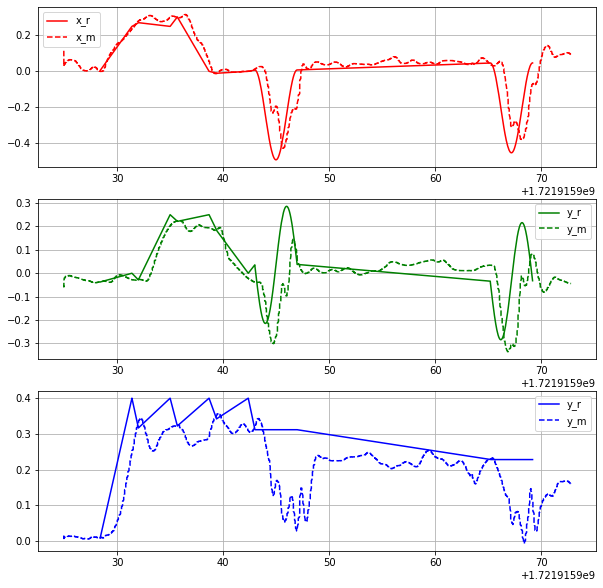

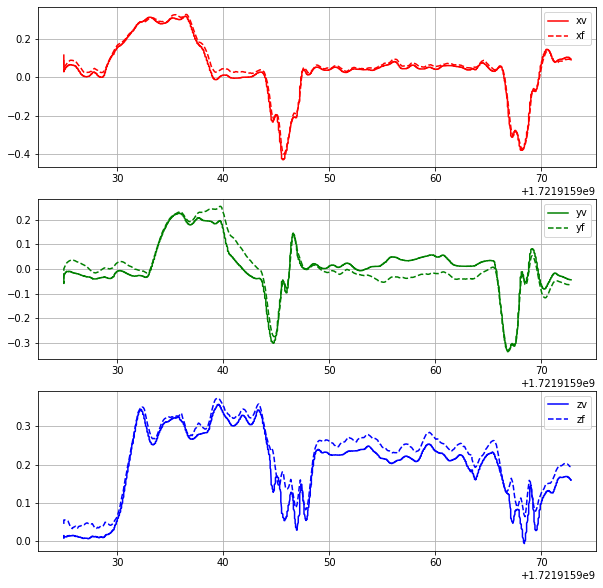

In [25]:
plot_position('./bags/square_circle.bag')
plot_odometries('./bags/square_circle.bag')

[INFO]  Data folder ./bags/ground_effect already exists. Not creating.
[INFO]  Data folder ./bags/ground_effect already exists. Not creating.


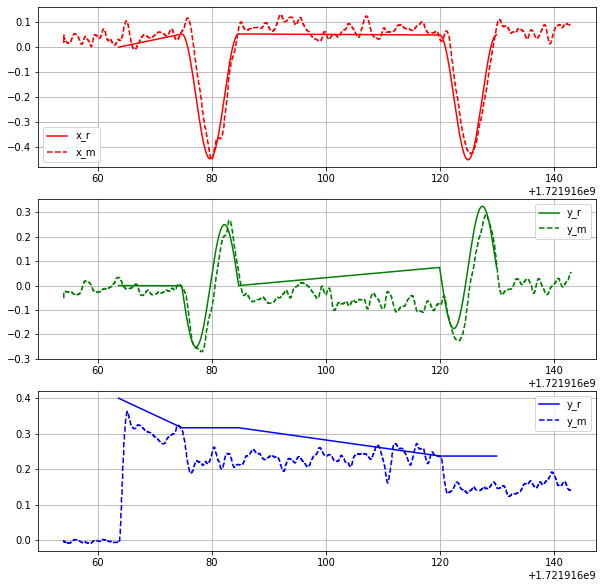

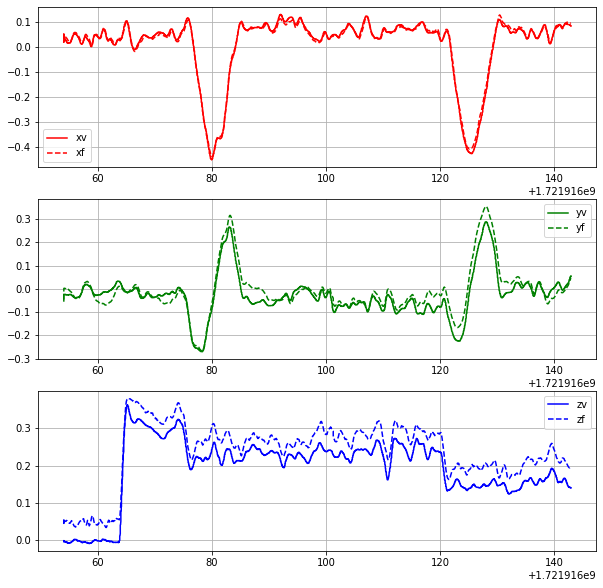

In [26]:
plot_position('./bags/ground_effect.bag')
plot_odometries('./bags/ground_effect.bag')